# 1. 로지스틱 회귀모형

In [21]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

data_total = pd.read_csv('./data_total221.csv', encoding='cp949')
data_total.drop('Unnamed: 0', axis=1, inplace=True)

scaler = StandardScaler()
data_total[['금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채']]=scaler.fit_transform(data_total[['금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채']])


## 1.1 데이터 분류

In [22]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

new_rate_train1 = pd.read_csv('./정상뉴스_train_기사비율.csv', encoding='cp949')

new_rate_train2 = pd.read_csv('./관리뉴스_train_기사비율.csv', encoding='cp949')

new_rate_test1 = pd.read_csv('./관리뉴스_test_기사비율.csv', encoding='cp949')

new_rate_test2 = pd.read_csv('./정상뉴스_test_기사비율.csv', encoding='cp949')

new_rate_train = pd.concat([new_rate_train1, new_rate_train2])
new_rate_test = pd.concat([new_rate_test1, new_rate_test2])

In [23]:
# TF-IDF 구하기
new_rate_train['TFIDF'] = new_rate_train['TF']*np.log10(np.reciprocal(new_rate_train['부도기사비율']/100))
new_rate_train['TFIDF'] = new_rate_train['TFIDF'].fillna(0)
new_rate_train['TFIDF'] = new_rate_train['TFIDF'].replace([np.inf, -np.inf], 0)

new_rate_test['TFIDF'] = new_rate_test['TF']*np.log10(np.reciprocal(new_rate_test['부도기사비율']/100))
new_rate_test['TFIDF'] = new_rate_test['TFIDF'].fillna(0)
new_rate_test['TFIDF'] = new_rate_test['TFIDF'].replace([np.inf, -np.inf], 0)

c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
li_1 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='11-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_2 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='12-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_3 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='14-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_4 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='15-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_5 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='13-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_6 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='16-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_7 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='17-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_8 =data_total.loc[(data_total['회계년도']=='17-Dec') & (data_total['label'] == 0), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]

X_train = pd.concat([li_1,li_2,li_3,li_4,li_5,li_6,li_7,li_8])
X_train = X_train[['회사명','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]

li_1_test =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='18-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_2_test =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='19-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_3_test =data_total.loc[(data_total['회계년도']=='19-Dec') & (data_total['label'] == 0), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]

X_test = pd.concat([li_1_test,li_2_test,li_3_test])
X_test = X_test[['회사명','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]


In [25]:
X_train.columns = X_train.columns.str.replace('회사명','종목명')
X_test.columns = X_test.columns.str.replace('회사명','종목명')

X_train['종목명'] = X_train['종목명'].str.replace("(주)","")
X_train['종목명'] = X_train['종목명'].str.replace('(','')
X_train['종목명'] = X_train['종목명'].str.replace(')','')

X_test['종목명'] = X_test['종목명'].str.replace("(주)","")
X_test['종목명'] = X_test['종목명'].str.replace('(','')
X_test['종목명'] = X_test['종목명'].str.replace(')','')

C:\Users\PC1\AppData\Local\Temp\ipykernel_17576\1936099441.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train['종목명'] = X_train['종목명'].str.replace("(주)","")
C:\Users\PC1\AppData\Local\Temp\ipykernel_17576\1936099441.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X_train['종목명'] = X_train['종목명'].str.replace('(','')
C:\Users\PC1\AppData\Local\Temp\ipykernel_17576\1936099441.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X_train['종목명'] = X_train['종목명'].str.replace(')','')
C:\Users\PC1\AppData\Local\Temp\ipykernel_17576\1936099441.py:8: FutureWarning: The default value of regex will change from True to False in a 

In [26]:
new_train =  pd.merge(new_rate_train, X_train , on= '종목명', how = 'left')
new_test = pd.merge(new_rate_test, X_test , on= '종목명', how = 'left')

In [27]:
new_train

,종목명,부도기사비율,1m_ratio,2m_ratio,3m_ratio,4m_ratio,5m_ratio,6m_ratio,TF,TFIDF,금융비용 대 총비용비율,CASH FLOW 대 총자본비율,순운전자본비율,현금비율,차입금의존도,현금비율(CASHTA),판매관리비대매출액,고정비율,이자비용/부채,label
0,씨제이프레시웨이,32.142857,14.285714,17.857143,0.000000,0.0,0.000000,0.000000,0,0.000000,-0.288317,0.019651,-0.772382,-0.577862,0.599616,-0.548603,-0.538476,-0.431801,-0.472727,0.0
1,CMG제약,9.375000,0.000000,6.250000,3.125000,0.0,0.000000,0.000000,3,3.084086,-1.363410,0.163775,1.504479,-0.380437,-1.183658,-0.791519,0.040886,-0.659144,-1.114311,0.0
2,ITX엠투엠,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,7,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,제이더블유신약,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4,0.000000,0.495166,-0.163397,-0.390273,-0.645002,1.755734,-1.037462,0.342588,-0.287587,0.244034,0.0
4,TJ미디어,5.555556,5.555556,0.000000,0.000000,0.0,0.000000,0.000000,1,1.255273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,해덕파워웨이,17.647059,7.843137,4.901961,4.901961,0.0,0.000000,0.000000,26,19.586519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,현진소재,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,0.839477,-0.348550,-1.192385,-0.660646,2.213081,-1.088098,-0.649479,1.527650,0.456152,1.0
319,협진,61.290323,12.903226,16.129032,6.451613,0.0,16.129032,9.677419,6,1.275649,-0.372638,-0.837730,-0.022902,-0.574522,-0.022658,-0.895129,-0.531332,0.105498,-1.029074,1.0
320,화진,15.000000,2.000000,7.000000,1.000000,5.0,0.000000,0.000000,14,11.534722,-0.249670,1.108472,-0.485011,-0.389726,0.429806,-0.074655,-0.502772,0.381335,-0.827195,1.0


In [28]:
new_train.drop(['1m_ratio', '2m_ratio','3m_ratio' , '4m_ratio', '5m_ratio', '6m_ratio' , 'TF'], axis=1 , inplace=True)
new_test.drop(['1m_ratio', '2m_ratio','3m_ratio' , '4m_ratio', '5m_ratio', '6m_ratio' , 'TF'], axis=1 , inplace=True)

In [29]:
new_train.dropna(axis = 0 ,inplace=True)
new_test.dropna(axis = 0 ,inplace=True)

X_train = new_train.drop(['종목명','label'], axis= 1 )
y_train = new_train[['label']]

X_test = new_test.drop(['종목명','label'], axis= 1 )
y_test = new_test[['label']]



In [100]:
new_train


,종목명,부도기사비율,TFIDF,금융비용 대 총비용비율,CASH FLOW 대 총자본비율,순운전자본비율,현금비율,차입금의존도,현금비율(CASHTA),판매관리비대매출액,고정비율,이자비용/부채,label
0,씨제이프레시웨이,32.142857,0.000000,-0.288317,0.019651,-0.772382,-0.577862,0.599616,-0.548603,-0.538476,-0.431801,-0.472727,0.0
1,CMG제약,9.375000,3.084086,-1.363410,0.163775,1.504479,-0.380437,-1.183658,-0.791519,0.040886,-0.659144,-1.114311,0.0
3,제이더블유신약,0.000000,0.000000,0.495166,-0.163397,-0.390273,-0.645002,1.755734,-1.037462,0.342588,-0.287587,0.244034,0.0
8,국일신동,0.000000,0.000000,-0.383178,0.622448,0.397803,-0.178693,-1.126693,-0.765855,-0.683346,-0.214706,-1.073721,0.0
9,국일제지,12.820513,5.352568,-1.113961,-0.286482,-0.767118,-0.597743,0.886611,-0.776391,-0.519476,-0.273187,0.719787,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,한진피앤씨,44.827586,21.952643,0.857043,0.439399,-1.660108,-0.664394,1.412316,-1.113872,-0.588680,1.652138,0.529756,1.0
318,현진소재,0.000000,0.000000,0.839477,-0.348550,-1.192385,-0.660646,2.213081,-1.088098,-0.649479,1.527650,0.456152,1.0
319,협진,61.290323,1.275649,-0.372638,-0.837730,-0.022902,-0.574522,-0.022658,-0.895129,-0.531332,0.105498,-1.029074,1.0
320,화진,15.000000,11.534722,-0.249670,1.108472,-0.485011,-0.389726,0.429806,-0.074655,-0.502772,0.381335,-0.827195,1.0


In [33]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time 

# 회귀모델에서 b0를 위한 상수항 추가

## 1.1 sm을 이용한 로지스틱 회귀모형

In [34]:
# 로지스틱 모형 적합
model = sm.Logit(y_train, X_train)
results = model.fit()    # 다변수함수에 뉴턴방법을 적용한 로지스틱 회귀모형
results.summary()

Optimization terminated successfully.
         Current function value: 0.107965
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                  214
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                           10
Date:                Thu, 06 Oct 2022   Pseudo R-squ.:                  0.8442
Time:                        17:50:01   Log-Likelihood:                -23.105
converged:                       True   LL-Null:                       -148.32
Covariance Type:            nonrobust   LLR p-value:                 4.388e-48
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
부도기사비율                0.0055      0.026      0.214      0.830      -0.045       0.056
TFIDF                 0.2479      0.079      3.148      0.002       0.094       0.402
금융비용 대 총비용비율          1.5938      0.703      2.267      0.023       0.216       2.972
CASH FLOW 대 총자본비율    -2.2380      0.732     -3.059      0.002      -3.672      -0.804
순운전자본비율               5.4674      1.725      3.170      0.002       2.087       8.847
현금비율                 -0.6981      0.686     -1.018      0.309      -2.042       0.646
차입금의존도                0.9272      0.613      1.513      0.130      -0.274       2.129
현금비율(CASHTA)          1.5381      0.629      2.447      0.014       0.306       2.770
판매관리비대매출액            -0.5659      0.463     -1.223      0.221      -1.473       0.341
고정비율                 18.2735      4.314      4.235      0.000       9.817      26.730
이자비용/부채              -3.0092      0.983     -3.063      0.002      -4.935      -1.084
=====================================================================================

Possibly complete quasi-separation: A fraction 0.37 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [35]:
results.params

부도기사비율                0.005519
TFIDF                 0.247929
금융비용 대 총비용비율          1.593834
CASH FLOW 대 총자본비율    -2.237983
순운전자본비율               5.467392
현금비율                 -0.698052
차입금의존도                0.927168
현금비율(CASHTA)          1.538092
판매관리비대매출액            -0.565852
고정비율                 18.273478
이자비용/부채              -3.009227
dtype: float64

In [36]:
np.exp(results.params) ## 로지스틱 결과는 log 형태가 취해진 결과이기 때문에 
                       ## exp를 통해 확인해 볼 필요가 있다

부도기사비율               1.005535e+00
TFIDF                1.281369e+00
금융비용 대 총비용비율         4.922586e+00
CASH FLOW 대 총자본비율    1.066735e-01
순운전자본비율              2.368416e+02
현금비율                 4.975538e-01
차입금의존도               2.527342e+00
현금비율(CASHTA)         4.655697e+00
판매관리비대매출액            5.678761e-01
고정비율                 8.631187e+07
이자비용/부채              4.932978e-02
dtype: float64

In [37]:
# 임계값 함수
pred_y = results.predict(X_test)

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)

# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
	return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])

# 임계값 0~1에 따른 정확도 확인

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
	pred_Y = cut_off(pred_y,i)
	cfmat = confusion_matrix(y_test,pred_Y)
	table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table


performance,ACC
threshold,
0.0,0.515152
0.1,0.893939
0.2,0.924242
0.3,0.924242
0.4,0.909091
0.5,0.909091
0.6,0.909091
0.7,0.909091
0.8,0.893939


AUC: 0.9503676470588236


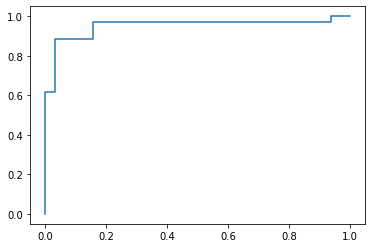

In [38]:
# sklearn에서 ROC 패키지 활용
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test,pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## 1.2 sklearn 사용한 로지스틱 회귀모형

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import numpy as np

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


print("정확도 :", accuracy_score(y_test , pred))
print("정밀도 :", precision_score(y_test, pred))
print("재현율 :", recall_score(y_test, pred))
print("f1 score :", f1_score(y_test, pred))


정확도 : 0.8787878787878788
정밀도 : 0.9642857142857143
재현율 : 0.7941176470588235
f1 score : 0.8709677419354839


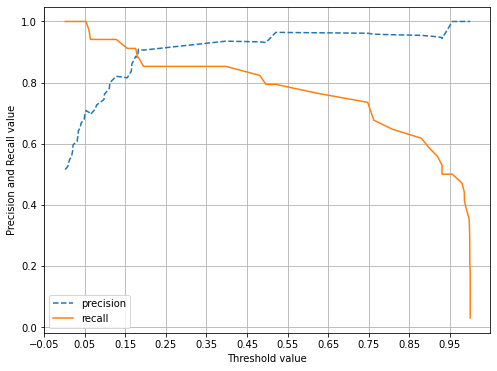

In [41]:
# 임계값에 따른 recall, precision 값 함수

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds , precisions[0:thresholds_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds , recalls[0:thresholds_boundary], label = 'recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # X축, Y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
    

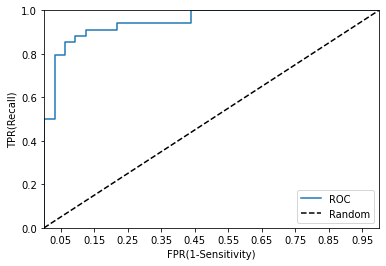

In [42]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs,tprs,label = 'ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경 , X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [43]:
confusion_matrix(y_test , pred)

array([[31,  1],
       [ 7, 27]], dtype=int64)

## 1.3 GridSearchCV 통한 Logit

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 25 , 50, 75, 100],
              'penalty': ['l1', 'l2']
              }

# 그리드 서치 진행
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWar

0.9090909090909091

In [45]:
pred_proba = grid_search.predict_proba(X_test)
pred = grid_search.predict(X_test)

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = grid_search.predict_proba(X_test)[:,1]

#실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

In [46]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print("정확도 :", accuracy_score(y_test , pred))
print("정밀도 :", precision_score(y_test, pred))
print("재현율 :", recall_score(y_test, pred))
print("f1 score :", f1_score(y_test, pred))

정확도 : 0.9090909090909091
정밀도 : 0.9666666666666667
재현율 : 0.8529411764705882
f1 score : 0.90625


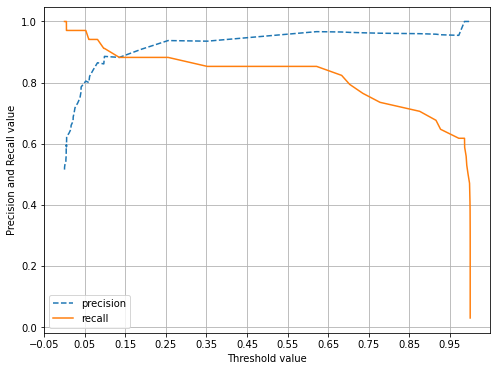

In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds , precisions[0:thresholds_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds , recalls[0:thresholds_boundary], label = 'recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # X축, Y축 label과 legend, 그리고 grid 설정

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, grid_search.predict_proba(X_test)[:,1])
    

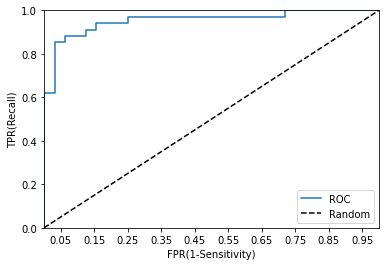

In [48]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs,tprs,label = 'ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경 , X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, grid_search.predict_proba(X_test)[:,1])

In [49]:
confusion_matrix(y_test , pred)

array([[31,  1],
       [ 5, 29]], dtype=int64)

# 2. SVM

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler

# 정규화 작업
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)


# test 데이터셋도 정규화(train 데이터셋 기준으로 학습시킨 정규화 모듈 사용)
# X_test = scaler.transform(X_test)

# SVM 모델 생성
model = SVC(kernel='linear', C = 1, degree = 3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # 예측 라벨
accuracy_score(y_test, y_pred)

c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8636363636363636

## 2.1 SVM 파라미터 조정을 통한 모델들의 성능 비교

In [51]:
# 필요 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [52]:
#Linear SVM을 위한 적절한 C값  검색
#분류:SVC, 회귀(예측):SVR

scores = []
for thisC in range(1,4):
    svc=SVC(kernel='linear',C=thisC) ## linear 를 활용
    model=svc.fit(X_train,y_train)
    scoreTrain=model.score(X_train,y_train)
    scoreTest=model.score(X_test,y_test)
    print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f}".format
          (thisC,scoreTrain, scoreTest))
    scores.append([scoreTrain, scoreTest])

선형 SVM : C:1, training score:0.962617, test score:0.863636
선형 SVM : C:2, training score:0.953271, test score:0.878788
선형 SVM : C:3, training score:0.953271, test score:0.893939


c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

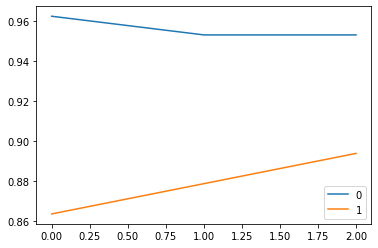

In [53]:
# C값에 따른 train test 정확도 비교
pd.DataFrame(scores).plot()

## 2.2 GridSearch CV 활용 -> 맨 뒤로 미뤄서 한번에 실행해볼것

In [54]:
from sklearn.model_selection import GridSearchCV
param={'C':[.1, .25, .5, 1],
      'gamma':[.1, .25, .5, 1]}
      #'kernel' : ['rbf', 'linear', 'poly']}
GS=GridSearchCV(SVC(kernel= 'linear', probability=True),param, cv=5)
GS.fit(X_train, y_train)
print(GS.best_params_)
print(GS.best_score_)

pred = GS.predict(X_test)

c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWar

{'C': 1, 'gamma': 0.1}
0.9297895902547065


In [55]:
print("정확도 :", accuracy_score(y_test , pred))
print("정밀도 :", precision_score(y_test, pred))
print("재현율 :", recall_score(y_test, pred))
print("f1 score :", f1_score(y_test, pred))

정확도 : 0.8636363636363636
정밀도 : 0.9629629629629629
재현율 : 0.7647058823529411
f1 score : 0.8524590163934426


## 2.3 ROC , 오차행렬 

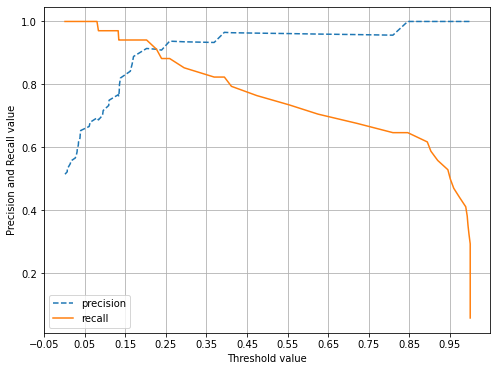

In [56]:
precision_recall_curve_plot(y_test, GS.predict_proba(X_test)[:,1])

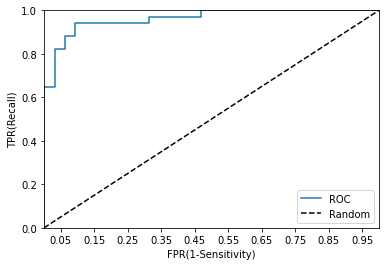

In [57]:
roc_curve_plot(y_test, GS.predict_proba(X_test)[:,1])

In [58]:
confusion_matrix(y_test , pred)

array([[31,  1],
       [ 8, 26]], dtype=int64)

In [59]:
GS.best_score_

0.9297895902547065

# 3. Decision Tree(의사결정나무)

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'. format(accuracy))

#DecisionTreeClassifier 의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())


결정 트리 예측 정확도 : 0.8636
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


## 3.1 GridSearchCV 이용한 의사결정

In [61]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split': [6,8,10,12,16,20,24],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5,
                      verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)


Fitting 5 folds for each of 294 candidates, totalling 1470 fits


c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 20}
0.8406423034330011


c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [62]:
from sklearn.metrics import accuracy_score

pred= grid_cv.predict(X_test)

accuracy=accuracy_score(y_test, pred)
accuracy

0.803030303030303

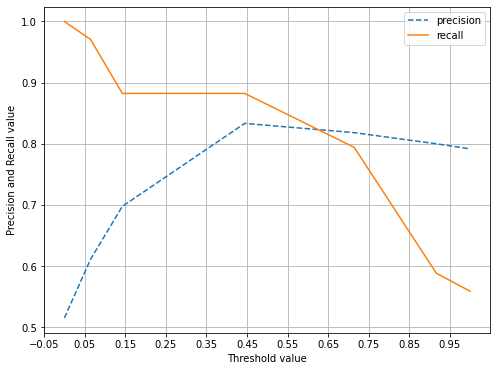

In [63]:
precision_recall_curve_plot(y_test, grid_cv.predict_proba(X_test)[:,1])

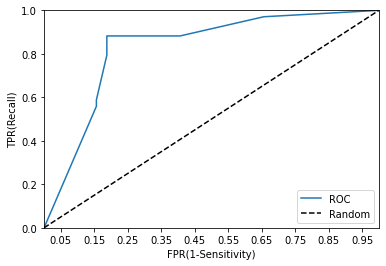

In [64]:
roc_curve_plot(y_test, grid_cv.predict_proba(X_test)[:,1])

In [65]:
print("정확도 :", accuracy_score(y_test , pred))
print("정밀도 :", precision_score(y_test, pred))
print("재현율 :", recall_score(y_test, pred))
print("f1 score :", f1_score(y_test, pred))

정확도 : 0.803030303030303
정밀도 : 0.8181818181818182
재현율 : 0.7941176470588235
f1 score : 0.8059701492537314


# 4. 앙상블

## 4.1 스태킹 앙상블
- 배깅 및 부스팅과 공통점 - 개별적인 여러 알고리즘을 서로 결합
- 차이점 : 예측한 데이터를 기반으로 다시 예측을 수행
* KNN
* 랜덤 포레스트
* 결정 트리
* 에이다 부스트
* 로지스틱 - 최종 모델

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier(random_state=125)
ada_clf = AdaBoostClassifier(n_estimators=100)


# 최종 모델
lr_final = LogisticRegression(C=10)

# 개별 모델 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# 개별 모델 예측 데이터 셋 및 정확도
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
rf_acc = accuracy_score(y_test, rf_pred)
dt_acc = accuracy_score(y_test, dt_pred)
ada_acc = accuracy_score(y_test, ada_pred)

print(f'KNN 정확도: {knn_acc:.4f}')
print(f'랜덤 포레스트 정확도: {rf_acc:.4f}')
print(f'결정 트리 정확도: {dt_acc:.4f}')
print(f'에이다부스트 정확도: {ada_acc:.4f}')

c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PC1\AppData\Local\Temp\ipykernel_17576\2277120478.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train , y_train)
c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNN 정확도: 0.7879
랜덤 포레스트 정확도: 0.8333
결정 트리 정확도: 0.8182
에이다부스트 정확도: 0.8485


In [67]:
# 개별 예측 결과를 stacking
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# 개별 모델의 예측 결과를 피처로 생성
pred = pred.T
print(pred.shape)

(4, 66)
(66, 4)


In [68]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
lr_final_acc = accuracy_score(y_test , final)

print(f'최종 메타 모델의 예측 정확도: {lr_final_acc:.4f}')

최종 메타 모델의 예측 정확도: 0.8636


c:\Users\PC1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


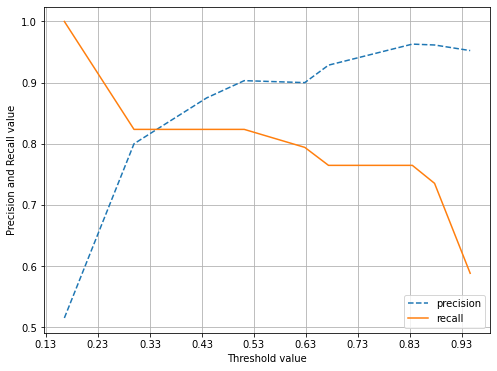

In [69]:
precision_recall_curve_plot(y_test, lr_final.predict_proba(pred)[:,1])

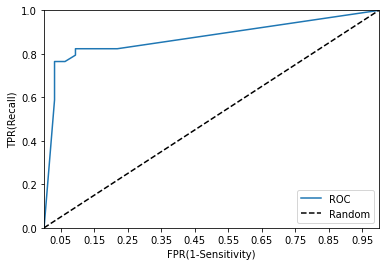

In [70]:
roc_curve_plot(y_test, lr_final.predict_proba(pred)[:,1])

In [71]:
print("정확도 :", accuracy_score(y_test , final))
print("정밀도 :", precision_score(y_test, final))
print("재현율 :", recall_score(y_test, final))
print("f1 score :", f1_score(y_test, final))

정확도 : 0.8636363636363636
정밀도 : 0.9032258064516129
재현율 : 0.8235294117647058
f1 score : 0.8615384615384616


In [72]:
confusion_matrix(y_test,final)

array([[29,  3],
       [ 6, 28]], dtype=int64)

In [73]:
y_test[y_test['label'] == 1]

,label
1,1.0
4,1.0
5,1.0
6,1.0
10,1.0
11,1.0
12,1.0
13,1.0
16,1.0
17,1.0


## 4.2 CV 스태킹 앙상블 (성능 안좋음 쓰지 못할 듯)
- 스태킹 앙상블의 문제 : 과적합 문제 발생
- 최종 학습에 메타 데이터를 사용하고 메타 데이터에 대한 예측을 진행

* 개별 모델이 4개이고, 데이터는 100개로 train 60개, test 40개, fold는 3이라 가정

* 첫 번째 모델에서 train 60개에 대해 학습시 train_fold 40개, test_fold 20개로 예측을 진행할 것이다.

* 각 fold별로 예측값은 20개씩 3번 구해지고 train 갯수와 같은 총 60개의 예측값을 얻을 수 있을 것이다. 이를 train 메타 데이터로 사용한다.

* 각 fold별로 test_fold가 아닌 test에 대해 예측을 진행한다. 즉, train_fold 40개로 test 40개를 예측한다.

* 3번 반복하면 40개씩 3묶음의 예측 데이터가 생성될 것이다. 이를 평균내어 40개의 test 메타 데이터로 사용한다.

* 개별 모델이 4개이므로 train 메타 데이터는 60 x 4, test 메타 데이터는 40 x 4로 생성 된다.

* train 메타 데이터를 피처로, y_train을 레이블로 학습 후, test 메타 데이터에 대해 예측하고 y_test와 비교로 평가한다

In [78]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_absolute_error

# # 개별 모델 정의
# knn_clf_2  = KNeighborsClassifier(n_neighbors=4)
# rf_clf_2 = RandomForestClassifier(n_estimators=100, random_state=0)
# dt_clf_2 = DecisionTreeClassifier(random_state=125)
# ada_clf_2 = AdaBoostClassifier(n_estimators=100)
# # X_train.columns = X_train.columns.str.replace(' ', '')
# # y_train.columns = y_train.columns.str.replace(' ', '')

# # X_train.columns = X_train.columns.str.replace('/', '')
# # y_train.columns = y_train.columns.str.replace('/', '')

# # X_train.columns = X_train.columns.str.replace('(', '')
# # y_train.columns = y_train.columns.str.replace('(', '')

# # X_train.columns = X_train.columns.str.replace(')', '')
# # y_train.columns = y_train.columns.str.replace(')', '')

# # X_train.columns = map(lambda x : str.replace(x, " ",""), X_train.columns)
# # y_train.columns = map(lambda x : str.replace(x, " ",""), y_train.columns)

# # X_train.index = map(lambda x : X_train.index.replace(x, " ",""), X_train.index)
# # y_train.index = map(lambda x : X_train.index.replace(x, " ",""), y_train.index)

# # 개별 모델별 메타 데이터
# def get_stacking_base_datasets(model, X_train, y_train, X_test, n_folds ):
#     # KFold 생성
#     kf = KFold(n_splits=n_folds, shuffle=True, random_state=1004)
    
#     # 메타 데이터 반환을 위한 기본 배열
#     train_cnt = X_train.shape[0]
#     test_cnt = X_test.shape[0]
#     train_meta = np.zeros((train_cnt, 1))
#     test_meta = np.zeros((test_cnt, n_folds))
    
#     print(model.__class__.__name__ , ' model 시작 ')
    
#     # train 데이터를 기반으로 fold를 나눠 학습/예측
#     for i , (train_fold_idx, test_fold_index) in enumerate(kf.split(X_train)):
#         # train, test fold 생성
#         print(f'\t 폴드 세트: {i+1} 시작 ')
#         x_train_fold = X_train.loc[train_fold_idx,:]
#         y_train_fold = y_train.loc[train_fold_idx,:] 
#         x_test_fold = X_train.loc[test_fold_index,:]  
        
#         # train_fold로 학습
#         model.fit(x_train_fold , y_train_fold)       
        
#         # train 메타 데이터 생성 (x_test_fold 예측)
#         train_meta[test_fold_index, :] = model.predict(x_test_fold).reshape(-1,1)
        
#         # test 메타 데이터 생성 (x_test 예측) - 평균 전
#         test_meta[:, i] = model.predict(X_test)
            
#     # test 메타 데이터 생성 - 평균 진행
#     test_meta_mean = np.mean(test_meta, axis=1).reshape(-1,1)    
    
#     # train test 메타 데이터 반환
#     return train_meta , test_meta_mean

In [ ]:
# knn_train, knn_test = get_stacking_base_datasets(knn_clf_2, X_train, y_train, X_test, 7)
# rf_train, rf_test = get_stacking_base_datasets(rf_clf_2, X_train, y_train, X_test, 7)
# dt_train, dt_test = get_stacking_base_datasets(dt_clf_2, X_train, y_train, X_test,  7)    
# ada_train, ada_test = get_stacking_base_datasets(ada_clf_2, X_train, y_train, X_test, 7)

### 4.2.1 메타데이터

In [47]:
# final_X_train_meta = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
# final_X_test_meta = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)

# print('원본 train 피처 데이터 Shape:',X_train.shape)
# print('원본 test 피처 데이터 Shape:',X_test.shape)
# print('최종 train 피처 메타 데이터 Shape:', final_X_train_meta.shape)
# print('최종 test 피처 메타 데이터 Shape:',final_X_test_meta.shape)

In [48]:
# # 최종 학습/예측/평가
# lr_final.fit(final_X_train_meta, y_train)
# final_pred = lr_final.predict(final_X_test_meta)
# final_acc = accuracy_score(y_test, final_pred)
# print(f'최종 메타 모델의 예측 정확도: {final_acc:.4f}')

In [49]:
# precision_recall_curve_plot(y_test, lr_final.predict_proba(final_X_test_meta)[:,1])

In [50]:
# roc_curve_plot(y_test, lr_final.predict_proba(final_X_test_meta)[:,1])

In [51]:
# print("정확도 :", accuracy_score(y_test , final_pred))
# print("정밀도 :", precision_score(y_test, final_pred))
# print("재현율 :", recall_score(y_test, final_pred))
# print("f1 score :", f1_score(y_test, final_pred))

# 5. DNN

In [93]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.random.set_seed(10)
drop_rate = 0.3
#모델 설정
model = Sequential()
model.add(Dense(36, input_dim = 11, activation = 'relu'))
model.add(tf.keras.layers.Dropout(drop_rate))
model.add(Dense(24, activation = 'relu'))
model.add(tf.keras.layers.Dropout(drop_rate))
model.add(Dense(12, activation = 'relu'))
model.add(tf.keras.layers.Dropout(drop_rate))
model.add(Dense(1, activation = 'sigmoid'))

#모델을 컴파일
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

#모델실행
history = model.fit(X_train,y_train, epochs = 100 , batch_size = 5)

#학습평가


Epoch 1/100
43/43 [==============================] - 1s 1ms/step - loss: 1.1984 - accuracy: 0.4860
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.5467
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.7365 - accuracy: 0.5888
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6028
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6308
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6682
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7243
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.7196
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.6963
Epoch 10/100
43/43 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.7243
Epoch 11/

In [95]:
# 임계값 정의에 따른 값 산출
pred = model.predict(X_test)
pred_arr = []
for i in pred:
    if i[0] >= 0.2 :
        pred_arr.append(1)
    else : 
        pred_arr.append(0)
pred_arr

3/3 [==============================] - 0s 2ms/step


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [96]:
# 임계값을 0.5로 했을 때의 결과
result = accuracy_score(pred_arr, y_test)
result

0.8939393939393939

3/3 [==============================] - 0s 2ms/step


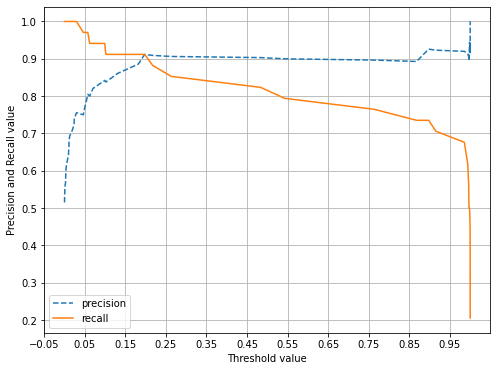

In [97]:
precision_recall_curve_plot(y_test, model.predict(X_test)[:,0])

3/3 [==============================] - 0s 2ms/step


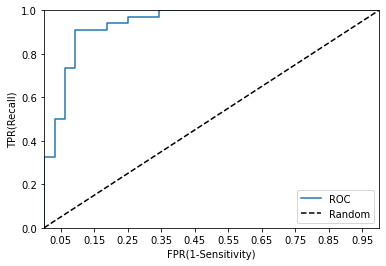

In [98]:
roc_curve_plot(y_test, model.predict(X_test)[:,0])

In [99]:
print("정확도 :", accuracy_score(pred_arr, y_test))
print("정밀도 :", precision_score(pred_arr, y_test))
print("재현율 :", recall_score(pred_arr, y_test))
print("f1 score :", f1_score(pred_arr, y_test))

정확도 : 0.8939393939393939
정밀도 : 0.8823529411764706
재현율 : 0.9090909090909091
f1 score : 0.8955223880597014


# 6. LSTM

https://tykimos.github.io/2017/08/17/Text_Input_Multiclass_Classification_Model_Recipe/

In [81]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


tf.random.set_seed(10)
drop_rate = 0.4
#모델 설정

X_train2=X_train.values.reshape((X_train.shape[0],X_train.shape[1],1))

model2 = Sequential()
model2.add(LSTM(12, activation = 'relu',return_sequences=True))
model2.add(LSTM(24, activation = 'relu',return_sequences=True))
model2.add(tf.keras.layers.Dropout(drop_rate))
model2.add(Dense(1, activation = 'sigmoid'))

#모델을 컴파일
model2.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

#모델실행
history = model2.fit(X_train2,y_train, epochs = 100 , batch_size = 5)

#학습평가


Epoch 1/100
43/43 [==============================] - 3s 7ms/step - loss: 0.7381 - accuracy: 0.5654
Epoch 2/100
43/43 [==============================] - 0s 8ms/step - loss: 0.6418 - accuracy: 0.6589
Epoch 3/100
43/43 [==============================] - 0s 9ms/step - loss: 0.6020 - accuracy: 0.6712
Epoch 4/100
43/43 [==============================] - 0s 9ms/step - loss: 0.5924 - accuracy: 0.6899
Epoch 5/100
43/43 [==============================] - 0s 9ms/step - loss: 0.5800 - accuracy: 0.6971
Epoch 6/100
43/43 [==============================] - 0s 9ms/step - loss: 0.5618 - accuracy: 0.7031
Epoch 7/100
43/43 [==============================] - 0s 9ms/step - loss: 0.5684 - accuracy: 0.7120
Epoch 8/100
43/43 [==============================] - 0s 11ms/step - loss: 0.5545 - accuracy: 0.7103
Epoch 9/100
43/43 [==============================] - 0s 10ms/step - loss: 0.5529 - accuracy: 0.7201
Epoch 10/100
43/43 [==============================] - 0s 10ms/step - loss: 0.5463 - accuracy: 0.7247
Epoch 

In [82]:
X_test2=X_test.values.reshape((X_test.shape[0],X_test.shape[1],1))
# 임계값 정의에 따른 값 산출
pred = model2.predict(X_test2)
pred_arr = []
for i in pred:
    if i[0] >=  0.5:
        pred_arr.append(1)
    else : 
        pred_arr.append(0)
pred_arr

3/3 [==============================] - 0s 3ms/step


[0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [83]:
# 임계값을 0.5로 했을 때의 결과
result = accuracy_score(pred_arr, y_test)
result

0.6363636363636364

3/3 [==============================] - 0s 5ms/step


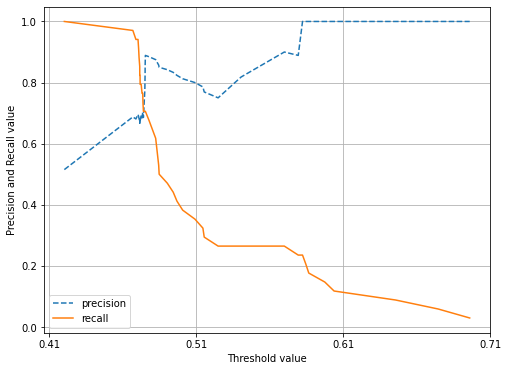

In [84]:
precision_recall_curve_plot(y_test, model2.predict(X_test2)[:,0])

3/3 [==============================] - 0s 3ms/step


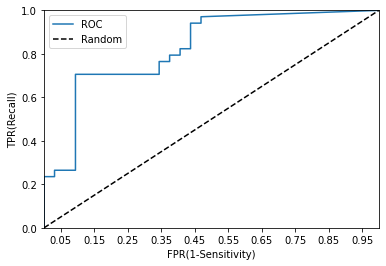

In [85]:
roc_curve_plot(y_test, model2.predict(X_test2)[:,0])

In [88]:
pred = model2.predict(X_test2)
pred_arr = []
for i in pred:
    if i[0] >=  0.46:
        pred_arr.append(1)
    else : 
        pred_arr.append(0)
pred_arr

3/3 [==============================] - 0s 3ms/step


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1]

In [89]:
print("정확도 :", accuracy_score(pred_arr, y_test))
print("정밀도 :", precision_score(pred_arr, y_test))
print("재현율 :", recall_score(pred_arr, y_test))
print("f1 score :", f1_score(pred_arr, y_test))

정확도 : 0.7575757575757576
정밀도 : 0.9705882352941176
재현율 : 0.6875
f1 score : 0.8048780487804877


# 7. 원본 데이터를 이용하여 모델 강건성 평가

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data2017_total = pd.read_csv('./정상기업2017_2_1.csv', encoding='cp949')
data2017_total.drop('Unnamed: 0', axis= 1, inplace=True)

data2019_total = pd.read_csv('./정상기업2019_2_1.csv', encoding='cp949')
data2019_total.drop('Unnamed: 0', axis= 1, inplace=True)

total_test = pd.concat([data2017_total,data2019_total])
total_test = total_test.replace(np.inf, np.nan)
total_test.dropna(axis=0 , inplace=True)

# 데이터 전처리 및 정규화
total_x = total_test[['금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채']]
total_y = total_test[['label']]

scaler = StandardScaler()
total_x = pd.DataFrame(scaler.fit_transform(total_x) , columns=total_x.columns)

In [67]:
# 임계값 정의에 따른 값 산출
pred_DNN = model.predict(total_x)
pred_arr_DNN = []
for i in pred_DNN:
    if i[0] >= 0.1 :
        pred_arr_DNN.append(1)
    else : 
        pred_arr_DNN.append(0)
pred_arr_DNN

# 임계값 정의에 따른 값 산출

total_x_2=total_x.values.reshape((total_x.shape[0],total_x.shape[1],1))

pred_LSTM = model2.predict(total_x_2)
pred_arr_LSTM = []
for i in pred_LSTM:
    if i[0] >= 0.4 :
        pred_arr_LSTM.append(1)
    else : 
        pred_arr_LSTM.append(0)
pred_arr_LSTM

72/72 [==============================] - 0s 4ms/step


[0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [68]:
pred_lr = lr_clf.predict(total_x)
pred_gridlr = grid_search.predict(total_x)
pred_gridsvm = GS.predict(total_x)
pred_griddeci = grid_cv.predict(total_x)


In [69]:
# 개별 모델 예측 데이터 셋 및 정확도
knn_pred = knn_clf.predict(total_x)
rf_pred = rf_clf.predict(total_x)
dt_pred = dt_clf.predict(total_x)
ada_pred = ada_clf.predict(total_x)

knn_acc = accuracy_score(total_y, knn_pred)
rf_acc = accuracy_score(total_y, rf_pred)
dt_acc = accuracy_score(total_y, dt_pred)
ada_acc = accuracy_score(total_y, ada_pred)

# 개별 예측 결과를 stacking
pred_stacking = np.array([knn_pred, rf_pred, dt_pred, ada_pred])

# 개별 모델의 예측 결과를 피처로 생성
pred_stacking2  = pred_stacking.T

final_2 = lr_final.predict(pred_stacking2)
lr_final_acc = accuracy_score(total_y , final_2)



In [70]:
print('로지스틱 모형 정확도 :' , accuracy_score(total_y, pred_lr))
print('Grid 로지스틱 모형 정확도 :' , accuracy_score(total_y, pred_gridlr))
print('Grid SVM 모형 정확도 :', accuracy_score(total_y, pred_gridsvm))
print('Grid 의사결정 모형 정확도 :' , accuracy_score(total_y, pred_griddeci))
print('스태킹 앙상블 모델 정확도:', accuracy_score(total_y , final_2))
print('DNN 모형 정확도 :' , accuracy_score(total_y, pred_arr_DNN))
print('LSTM 모형 정확도 :' , accuracy_score(total_y, pred_arr_LSTM))


로지스틱 모형 정확도 : 0.8423580786026201
Grid 로지스틱 모형 정확도 : 0.6768558951965066
Grid SVM 모형 정확도 : 0.7707423580786026
Grid 의사결정 모형 정확도 : 0.8379912663755459
스태킹 앙상블 모델 정확도: 0.8030567685589519
DNN 모형 정확도 : 0.6344978165938865
LSTM 모형 정확도 : 0.7611353711790393


In [71]:
print('로지스틱 모형 재현율 :' , recall_score(total_y, pred_lr))
print('Grid 로지스틱 모형 재현율 :' , recall_score(total_y, pred_gridlr))
print('Grid SVM 모형 재현율 :', recall_score(total_y, pred_gridsvm))
print('Grid 의사결정 모형 재현율 :' , recall_score(total_y, pred_griddeci))
print('스태킹 앙상블 모델 재현율:', recall_score(total_y , final_2))
print('DNN 모형 재현율 :' , recall_score(total_y, pred_arr_DNN))
print('LSTM 모형 재현율 :' , recall_score(total_y, pred_arr_LSTM))


로지스틱 모형 재현율 : 0.9326241134751773
Grid 로지스틱 모형 재현율 : 0.9680851063829787
Grid SVM 모형 재현율 : 0.9468085106382979
Grid 의사결정 모형 재현율 : 0.6985815602836879
스태킹 앙상블 모델 재현율: 0.9361702127659575
DNN 모형 재현율 : 0.9858156028368794
LSTM 모형 재현율 : 0.6028368794326241


In [72]:
confusion_matrix(total_y, pred_arr_LSTM)

array([[1573,  435],
       [ 112,  170]], dtype=int64)

In [73]:
total_y[total_y['label'] == 0 ]

,label
0,0
1,0
2,0
3,0
4,0
...,...
1114,0
1115,0
1116,0
1117,0


In [74]:
print('로지스틱 모형 정밀도 :' , precision_score(total_y, pred_lr))
print('Grid 로지스틱 모형 정밀도 :' , precision_score(total_y, pred_gridlr))
print('Grid SVM 모형 정밀도 :', precision_score(total_y, pred_gridsvm))
print('Grid 의사결정 모형 정밀도 :' , precision_score(total_y, pred_griddeci))
print('스태킹 앙상블 모델 정밀도:', precision_score(total_y , final_2))
print('DNN 모형 정밀도 :' , precision_score(total_y, pred_arr_DNN))
print('LSTM 모형 정밀도 :' , precision_score(total_y, pred_arr_LSTM))


로지스틱 모형 정밀도 : 0.43471074380165287
Grid 로지스틱 모형 정밀도 : 0.27191235059760954
Grid SVM 모형 정밀도 : 0.3436293436293436
Grid 의사결정 모형 정밀도 : 0.4078674948240166
스태킹 앙상블 모델 정밀도: 0.3787661406025825
DNN 모형 정밀도 : 0.2502250225022502
LSTM 모형 정밀도 : 0.2809917355371901


In [75]:
print('로지스틱 모형 F1-score :' , f1_score(total_y, pred_lr))
print('Grid 로지스틱 모형 F1-score :' , f1_score(total_y, pred_gridlr))
print('Grid SVM 모형 F1-score :', f1_score(total_y, pred_gridsvm))
print('Grid 의사결정 모형 F1-score :' , f1_score(total_y, pred_griddeci))
print('스태킹 앙상블 모델 F1-score:', f1_score(total_y , final_2))
print('DNN 모형 F1-score :' , f1_score(total_y, pred_arr_DNN))
print('LSTM 모형 F1-score :' , f1_score(total_y, pred_arr_LSTM))


로지스틱 모형 F1-score : 0.593010146561443
Grid 로지스틱 모형 F1-score : 0.4245723172628305
Grid SVM 모형 F1-score : 0.5042492917847026
Grid 의사결정 모형 F1-score : 0.5150326797385621
스태킹 앙상블 모델 F1-score: 0.5393258426966292
DNN 모형 F1-score : 0.39913854989231873
LSTM 모형 F1-score : 0.3833145434047351


# 8. 재무 모델로 예측된 값과 관리기사비율 + TF-IDF 값을 활용한 예측

In [150]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

new_rate_train1 = pd.read_csv('./정상뉴스_train_기사비율.csv', encoding='cp949')
new_rate_train1['label'] = 0

new_rate_train2 = pd.read_csv('./관리뉴스_train_기사비율.csv', encoding='cp949')
new_rate_train2['label'] = 1

new_rate_test1 = pd.read_csv('./관리뉴스_test_기사비율.csv', encoding='cp949')
new_rate_test1['label'] = 1

new_rate_test2 = pd.read_csv('./정상뉴스_test_기사비율.csv', encoding='cp949')
new_rate_test2['label'] = 0

new_rate_train = pd.concat([new_rate_train1, new_rate_train2])
new_rate_test = pd.concat([new_rate_test1, new_rate_test2])

In [151]:
new_rate_train

,종목명,부도기사비율,1m_ratio,2m_ratio,3m_ratio,4m_ratio,5m_ratio,6m_ratio,label
0,씨제이프레시웨이,32.142857,35.714286,64.285714,0.000000,0.000000,0.000000,0.000000,0
1,CMG제약,9.375000,0.000000,87.500000,12.500000,0.000000,0.000000,0.000000,0
2,아이티엑스에이아이,0.000000,14.285714,10.714286,0.000000,50.000000,21.428571,3.571429,0
3,제이더블유신약,0.000000,4.444444,71.111111,0.000000,24.444444,0.000000,0.000000,0
4,TJ미디어,5.555556,5.555556,5.555556,16.666667,38.888889,22.222222,11.111111,0
...,...,...,...,...,...,...,...,...,...
165,해덕파워웨이,17.647059,29.411765,45.098039,20.588235,4.901961,0.000000,0.000000,1
166,현진소재,0.000000,14.893617,27.659574,0.000000,29.787234,21.276596,6.382979,1
167,협진,61.290323,32.258065,16.129032,12.903226,0.000000,25.806452,12.903226,1
168,화진,15.000000,11.000000,30.000000,10.000000,19.000000,0.000000,30.000000,1


## 모델의 train set 만들기

In [157]:
pred_lr_train_new = lr_clf.predict(X_train)
pred_gridlr_train_new = grid_search.predict(X_train)
pred_gridsvm_train_new = GS.predict(X_train)
pred_griddeci_train_new = grid_cv.predict(X_train)


In [158]:
# 개별 모델 예측 데이터 셋 및 정확도
knn_pred_train_new = knn_clf.predict(X_train)
rf_pred_train_new = rf_clf.predict(X_train)
dt_pred_train_new = dt_clf.predict(X_train)
ada_pred_train_new = ada_clf.predict(X_train)

knn_acc_train_new = accuracy_score(y_train, knn_pred_train_new)
rf_acc_train_new = accuracy_score(y_train, rf_pred_train_new)
dt_acc_train_new = accuracy_score(y_train, dt_pred_train_new)
ada_acc_train_new = accuracy_score(y_train, ada_pred_train_new)

# 개별 예측 결과를 stacking
pred_stacking_train_new_train = np.array([knn_pred_train_new, rf_pred_train_new, dt_pred_train_new, ada_pred_train_new])

# 개별 모델의 예측 결과를 피처로 생성
pred_stacking_train_new_train2  = pred_stacking_train_new_train.T

final_2_train_new= lr_final.predict(pred_stacking_train_new_train2)


In [159]:
# 임계값 정의에 따른 값 산출
pred_DNN = model.predict(X_train)
pred_arr_DNN = []
for i in pred_DNN:
    if i[0] >= 0.1 :
        pred_arr_DNN.append(1)
    else : 
        pred_arr_DNN.append(0)


# 임계값 정의에 따른 값 산출

X_train_2=X_train.values.reshape((X_train.shape[0],X_train.shape[1],1))

pred_LSTM = model2.predict(X_train_2)
pred_arr_LSTM = []
for i in pred_LSTM:
    if i[0] >= 0.4 :
        pred_arr_LSTM.append(1)
    else : 
        pred_arr_LSTM.append(0)


20/20 [==============================] - 0s 3ms/step


In [160]:
# 데이터 프레임 형태로 생성
new_df_train = pd.DataFrame(columns=['종목명', 'logit', 'svm', 'decision', 'stacking', 'Dnn', 'lstm'])
new_df_train['logit'] = pred_gridlr_train_new
new_df_train['svm'] = pred_gridsvm_train_new
new_df_train['decision'] = pred_griddeci_train_new
new_df_train['stacking'] = final_2_train_new
new_df_train['Dnn'] = pred_arr_DNN
new_df_train['lstm'] = pred_arr_LSTM
new_df_train

,종목명,logit,svm,decision,stacking,Dnn,lstm
0,NaN,1,1,1,1,1,1
1,NaN,1,1,1,1,1,0
2,NaN,1,1,0,1,1,0
3,NaN,1,1,1,1,1,1
4,NaN,1,1,1,1,1,1
...,...,...,...,...,...,...,...
615,NaN,0,0,0,0,0,1
616,NaN,0,0,0,0,0,0
617,NaN,0,0,0,0,0,0
618,NaN,0,0,0,0,0,0


In [161]:
li_1 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='11-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_2 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='12-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_3 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='14-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_4 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='15-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_5 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='13-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_6 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='16-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_7 =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='17-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_8 =data_total.loc[(data_total['회계년도']=='17-Dec') & (data_total['label'] == 0), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]

X_train = pd.concat([li_1,li_2,li_3,li_4,li_5,li_6,li_7,li_8])
new_df_train['종목명'] = X_train['회사명']
new_df_train['label'] = X_train['label']
new_df_train.reset_index(drop= True ,inplace=True)

In [163]:
new_df_train['종목명'] = new_df_train['종목명'].str.replace("(주)","")
new_df_train['종목명'] = new_df_train['종목명'].str.replace('(','')
new_df_train['종목명'] = new_df_train['종목명'].str.replace(')','')

C:\Users\PC1\AppData\Local\Temp\ipykernel_9532\4263855565.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df_train['종목명'] = new_df_train['종목명'].str.replace("(주)","")
C:\Users\PC1\AppData\Local\Temp\ipykernel_9532\4263855565.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df_train['종목명'] = new_df_train['종목명'].str.replace('(','')
C:\Users\PC1\AppData\Local\Temp\ipykernel_9532\4263855565.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df_train['종목명'] = new_df_train['종목명'].str.replace(')','')


In [172]:
new_rate_train = new_rate_train[['종목명', '부도기사비율']]
new_rate_train = pd.merge(new_rate_train , new_df_train ,  on = '종목명' , how = 'left')
new_rate_train.dropna(axis= 0 , inplace=True)
new_rate_train

,종목명,부도기사비율,logit,svm,decision,stacking,Dnn,lstm
0,씨제이프레시웨이,32.142857,0.0,0.0,0.0,0.0,0.0,1.0
1,CMG제약,9.375000,1.0,1.0,1.0,1.0,1.0,0.0
2,아이티엑스에이아이,0.000000,1.0,1.0,0.0,1.0,1.0,1.0
3,제이더블유신약,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
8,국일신동,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
316,한진피앤씨,44.827586,0.0,0.0,0.0,0.0,0.0,0.0
318,현진소재,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
319,협진,61.290323,0.0,0.0,0.0,0.0,0.0,0.0
320,화진,15.000000,0.0,0.0,0.0,0.0,0.0,1.0


# 8.1 모델의 test set 만들기

In [92]:
pred_lr_new = lr_clf.predict(X_test)
pred_gridlr_new = grid_search.predict(X_test)
pred_gridsvm_new = GS.predict(X_test)
pred_griddeci_new = grid_cv.predict(X_test)


In [91]:
# 개별 모델 예측 데이터 셋 및 정확도
knn_pred_new = knn_clf.predict(X_test)
rf_pred_new = rf_clf.predict(X_test)
dt_pred_new = dt_clf.predict(X_test)
ada_pred_new = ada_clf.predict(X_test)

knn_acc_new = accuracy_score(y_test, knn_pred_new)
rf_acc_new = accuracy_score(y_test, rf_pred_new)
dt_acc_new = accuracy_score(y_test, dt_pred_new)
ada_acc_new = accuracy_score(y_test, ada_pred_new)

# 개별 예측 결과를 stacking
pred_stacking_new = np.array([knn_pred_new, rf_pred_new, dt_pred_new, ada_pred_new])

# 개별 모델의 예측 결과를 피처로 생성
pred_stacking_new2  = pred_stacking_new.T

final_2_new= lr_final.predict(pred_stacking_new2)


In [94]:
# 임계값 정의에 따른 값 산출
pred_DNN = model.predict(X_test)
pred_arr_DNN = []
for i in pred_DNN:
    if i[0] >= 0.1 :
        pred_arr_DNN.append(1)
    else : 
        pred_arr_DNN.append(0)


# 임계값 정의에 따른 값 산출

X_test_2=X_test.values.reshape((X_test.shape[0],X_test.shape[1],1))

pred_LSTM = model2.predict(X_test_2)
pred_arr_LSTM = []
for i in pred_LSTM:
    if i[0] >= 0.4 :
        pred_arr_LSTM.append(1)
    else : 
        pred_arr_LSTM.append(0)


8/8 [==============================] - 0s 3ms/step


In [130]:
# 데이터 프레임 형태로 생성
new_df = pd.DataFrame(columns=['종목명', 'logit', 'svm', 'decision', 'stacking', 'Dnn', 'lstm'])

In [131]:
li_1_test =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='18-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_2_test =data_total.loc[(data_total['label'] == 1) & (data_total['회계년도']=='19-Dec'), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]
li_3_test =data_total.loc[(data_total['회계년도']=='19-Dec') & (data_total['label'] == 0), ['회사명','거래소코드','금융비용 대 총비용비율', 'CASH FLOW 대 총자본비율', '순운전자본비율', '현금비율', '차입금의존도','현금비율(CASHTA)', '판매관리비대매출액', '고정비율', '이자비용/부채', 'label']]

X_test = pd.concat([li_1_test,li_2_test,li_3_test])
new_df['종목명'] = X_test['회사명']


In [132]:
new_df['logit'] = pred_gridlr_new
new_df['svm'] = pred_gridsvm_new
new_df['decision'] = pred_griddeci_new
new_df['stacking'] = final_2_new
new_df['Dnn'] = pred_arr_DNN
new_df['lstm'] = pred_arr_LSTM
new_df['label'] = X_test['label']
new_df

,종목명,logit,svm,decision,stacking,Dnn,lstm
781,(주)강원에너지,0,0,1,1,1,0
782,(주)녹원씨엔아이,0,0,0,0,1,1
783,(주)더블유아이,1,1,0,0,1,1
784,(주)라이트론,1,1,0,1,1,1
785,(주)리드,1,1,1,1,1,1
...,...,...,...,...,...,...,...
776,제이더블유신약(주),0,0,0,0,0,0
777,(주)삼진엘앤디,0,0,0,0,0,0
778,(주)정다운,0,0,0,0,0,0
779,(주)오스템,0,0,0,0,0,0


In [ ]:
new_df['logit'] = pred_gridlr_new
new_df['svm'] = pred_gridsvm_new
new_df['decision'] = pred_griddeci_new
new_df['stacking'] = final_2_new
new_df['Dnn'] = pred_arr_DNN
new_df['lstm'] = pred_arr_LSTM
new_df['label'] = X_test['label']
new_df

,종목명,logit,svm,decision,stacking,Dnn,lstm
781,(주)강원에너지,0,0,1,1,1,0
782,(주)녹원씨엔아이,0,0,0,0,1,1
783,(주)더블유아이,1,1,0,0,1,1
784,(주)라이트론,1,1,0,1,1,1
785,(주)리드,1,1,1,1,1,1
...,...,...,...,...,...,...,...
776,제이더블유신약(주),0,0,0,0,0,0
777,(주)삼진엘앤디,0,0,0,0,0,0
778,(주)정다운,0,0,0,0,0,0
779,(주)오스템,0,0,0,0,0,0


In [133]:
new_df.reset_index(drop= True ,inplace=True)

In [135]:
new_df['종목명'] = new_df['종목명'].str.replace("(주)","")
new_df['종목명'] = new_df['종목명'].str.replace('(','')
new_df['종목명'] = new_df['종목명'].str.replace(')','')

C:\Users\PC1\AppData\Local\Temp\ipykernel_9532\3046162436.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['종목명'] = new_df['종목명'].str.replace("(주)","")


In [173]:
new_rate_test = new_rate_test[['종목명', '부도기사비율']]
new_rate_test = pd.merge(new_rate_test , new_df ,  on = '종목명' , how = 'left')
new_rate_test.dropna(axis= 0 , inplace=True)
new_rate_test

,종목명,부도기사비율,logit,svm,decision,stacking,Dnn,lstm
1,녹원씨엔아이,12.871287,0.0,0.0,0.0,0.0,1.0,1.0
4,레드로버,27.777778,1.0,1.0,1.0,1.0,1.0,0.0
5,매직마이크로,6.250000,1.0,1.0,1.0,1.0,1.0,1.0
6,메디앙스,1.818182,1.0,1.0,0.0,1.0,1.0,0.0
10,세동,11.764706,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
88,플리토,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
89,피제이전자,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
90,하이즈항공,3.448276,0.0,0.0,0.0,0.0,0.0,0.0
91,한국비엔씨,1.694915,0.0,0.0,0.0,0.0,0.0,0.0


## 8.2 TF-IDF 구하기

In [ ]:
new_count_1 = pd.read_csv('./test정상_뉴스_기사비율.csv')
new_count_2 = pd.read_csv('./test관리_뉴스_기사비율.csv')

new_count_total = pd.concat([new_count_1,new_count_2])


new_count_total['TFIDF'] = new_count_1*np.log10(np.reciprocal(new_count_total))

## 8.3 모델링

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 25 , 50, 75, 100],
              'penalty': ['l1', 'l2']
              }

# 그리드 서치 진행
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

pred_proba = grid_search.predict_proba(X_test)
pred = grid_search.predict(X_test)

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = grid_search.predict_proba(X_test)[:,1]

#실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print("정확도 :", accuracy_score(y_test , pred))
print("정밀도 :", precision_score(y_test, pred))
print("재현율 :", recall_score(y_test, pred))
print("f1 score :", f1_score(y_test, pred))

## 8.3 감성분석 방법
* 감성분석 flaten
* 감성분석 0,1,2 * 가중치(score) 평균치 값 사용 

## 8.4 관리기사비율과 예측 값들을 데이터 프레임 형태로 생성